This example determine the type of object using NN 

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 2s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [8]:
columns = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

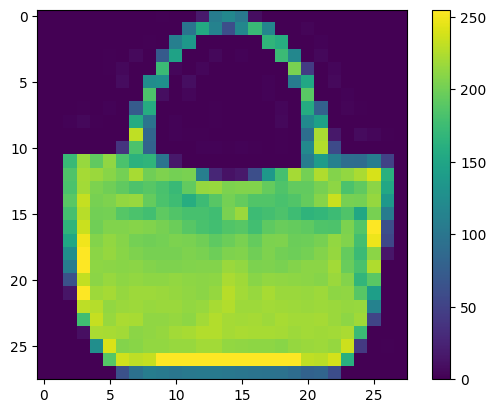

In [9]:
# Show image
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Reduce scale of grayscale to make computation easier
train_images = train_images / 255.0
test_images = test_images / 255.0

In [27]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier
'''
# define a function to create the Keras model
def create_model(epochs=3, optimizer='adam', activation='relu', hidden_layer_size=128):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  # input layer
    model.add(Dense(hidden_layer_size, activation=activation))  # hidden layer
    model.add(Dense(10, activation='softmax'))  # output layer
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# create a KerasClassifier wrapper for use in GridSearchCV
model = KerasClassifier(build_fn=create_model)

# define the parameter grid to search over
param_grid = {'epochs': [1, 5, 10], 'optimizer': ['adam', 'sgd'], 'activation': ['relu', 'tanh'], 'hidden_layer_size': [64, 128, 256]}

# create a GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the data
grid_result = grid.fit(train_images, train_labels)

# print the best score and best parameters found by GridSearchCV
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
'''



C:\Users\Christopher\AppData\Local\Temp\ipykernel_17232\1804973096.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


375/375 [==============================] - 1s 2ms/step - loss: 0.5615 - accuracy: 0.8133
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5454 - accuracy: 0.8116
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4139 - accuracy: 0.8545
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3713 - accuracy: 0.8676
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3451 - accuracy: 0.8761
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8775
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8097
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4101 - accuracy: 0.8538
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3702 - accuracy: 0.8673
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3449 - accuracy: 0.8764
Epoc

NameError: name 'epochs' is not defined

In [28]:
# Neural Network Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(256, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [29]:
# Loss Function Optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Train the NN with specified number of epochs
# Too many epochs make model overfit
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3041 - accuracy: 0.8882
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2860 - accuracy: 0.8942
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2693 - accuracy: 0.8995
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2588 - accuracy: 0.9032
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2463 - accuracy: 0.9076
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2376 - accuracy: 0.9103
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2272 - accuracy: 0.9144
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2204 - accuracy: 0.9174
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2119 - accuracy: 0.9206
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.203

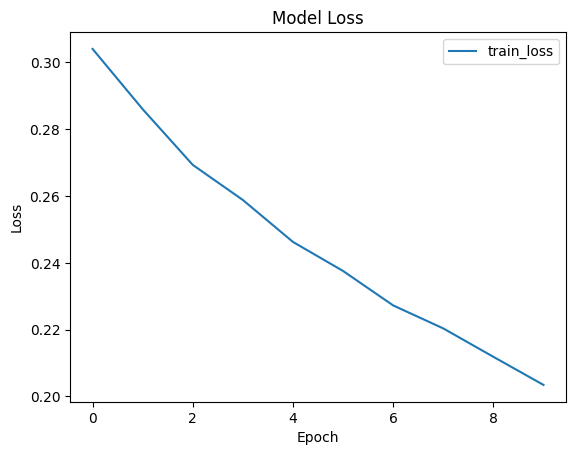

In [33]:
plt.plot(history.history['loss'], label='train_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [34]:
# Evaluating NN model using the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8813
Test accuracy: 0.8812999725341797


In [35]:
test_images.shape

(10000, 28, 28)

In [36]:
# Make label predictions for the test dataset
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Model's Raw Prediction: [2.1908335e-07 9.9999917e-01 6.3386700e-12 1.7086606e-07 4.0271234e-11
 4.7208864e-24 1.0278189e-10 2.5932766e-22 4.6857522e-07 4.9576255e-18]
Model's Prediction: 1
Actual Prediction: 1


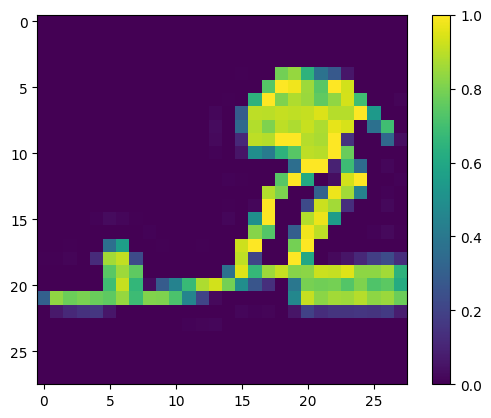

In [37]:
def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

observation = get_number()

# Looks at the model's prediction and actual
print(f"Model's Raw Prediction: {predictions[observation]}")
print(f"Model's Prediction: {np.argmax(predictions[observation])}")
print(f"Actual Prediction: {test_labels[observation]}")

# Image of the observation
plt.figure()
plt.imshow(train_images[observation])
plt.colorbar()
plt.grid(False)
plt.show()

313/313 [==============================] - 1s 2ms/step


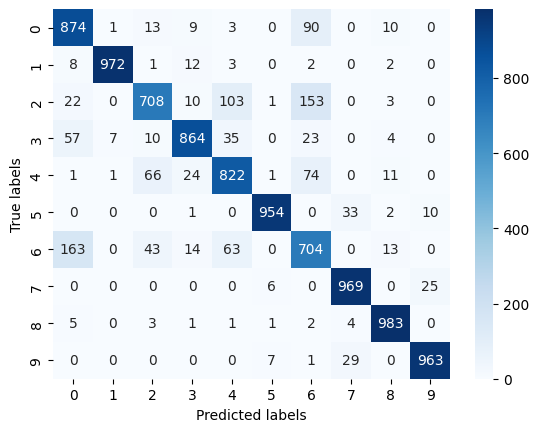

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred_labels = np.argmax(model.predict(test_images), axis = 1)

cm = confusion_matrix(test_labels, pred_labels)

classes = np.arange(10)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()